In [327]:
import SiteSearch as sitesearch
reload(sitesearch)

import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 10000

%load_ext line_profiler
#%lprun?

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [328]:
xml = "input.xml"

In [ ]:
%lprun -f sitesearch.evaluateXML -f sitesearch.objective_raster.buildCategoricalRasterStatFromXML dfs = sitesearch.evaluateXML(xml,returnDFInsteadOfLayerID=True)

C:/Users/RDCERNWG/Documents/GIT/FLW_Missouri Mission Folder/Results/ 1 3857
Section: Site Searches
Beginning site search 1 of 2: Airfield 1
WKT Template
Gridded Search
Generated 2950 candidate polygons in 1 seconds
Categorical Raster Stat: Criteria_1. Processed 2950 candidates in 21 seconds, retaining 2950 candidates
Continuous Raster Stat: Criteria_2. Processed 2950 candidates in 22 seconds, retaining 2950 candidates
Vector Layer: Criteria_3. Processed 2950 candidates in 22 seconds, retaining 2950 candidates
Cut Fill: Criteria_4. Processed 2950 candidates in 22 seconds, retaining 2950 candidates
Beginning site search 2 of 2: airfield 2
WKT Template
Gridded Search
Generated 1482 candidate polygons in 1 seconds
Categorical Raster Stat: LC_LandCover_GeoCover_proj_less than. Processed 1482 candidates in 10 seconds, retaining 1482 candidates
Continuous Raster Stat: Road_Distance_greater than. Processed 1482 candidates in 11 seconds, retaining 1482 candidates
Continuous Raster Stat: Water_D

In [325]:
df0 = dfs[0]
df1 = dfs[1]

In [326]:
df0.head()

,index,geometry,Criteria_1,Criteria_1_QAF,Criteria_2,Criteria_2_QAF,Criteria_3,Criteria_3_QAF,count,max,mean,min,totalCutFillVolume,Criteria_4,Criteria_4_QAF,Criteria_1_QAF_weighted,Criteria_2_QAF_weighted,Criteria_3_QAF_weighted,Criteria_4_QAF_weighted,MCDA_SCORE,MCDA_SCORE_STANDARDIZED
0,0,POLYGON ((-10260228.61403034 4556130.718112956...,0.000000,0.0,7.174781,0.0,914.547112,100.0,204,312.0,292.014706,264.0,2346.647059,2346.647059,100.0,0.0,0.0,25.0,25.0,50.0,52.631579
1,1,POLYGON ((-10260228.61403034 4556930.718112956...,1.360544,0.0,7.199372,0.0,1527.808389,100.0,200,312.0,286.815000,251.0,3090.180000,3090.180000,100.0,0.0,0.0,25.0,25.0,50.0,52.631579
2,2,POLYGON ((-10260751.98143581 4559213.932235508...,5.714286,0.0,9.113578,0.0,1582.647154,100.0,216,304.0,271.004630,243.0,3665.064815,3665.064815,100.0,0.0,0.0,25.0,25.0,50.0,52.631579
3,3,POLYGON ((-10259428.61403034 4552930.718112956...,0.000000,0.0,5.610746,40.0,367.069256,100.0,200,327.0,302.330000,272.0,3062.660000,3062.660000,100.0,0.0,10.0,25.0,25.0,60.0,63.157895
4,4,POLYGON ((-10259428.61403034 4553730.718112956...,0.000000,0.0,3.572735,100.0,0.000000,0.0,204,327.0,315.519608,292.0,1280.098039,1280.098039,100.0,0.0,25.0,0.0,25.0,50.0,52.631579


Text(0.5,0.98,u'Areas of Interest')

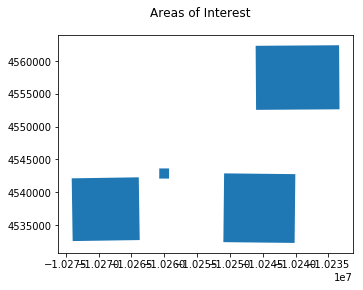

In [281]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
aoiDF = gpd.read_file("../FLW_Missouri Mission Folder/SUPPORT/Staging.shp")
aoiDF = aoiDF.to_crs({'init':'epsg:3857'})
squareDimension = 400
aoiDF.plot()
plt.suptitle("Areas of Interest")

In [282]:
aoiDF_unproj = aoiDF.to_crs({'init':'epsg:4326'})
airfieldAOI = aoiDF_unproj[aoiDF_unproj['Stage']=='Gold'].reset_index().geometry[0]
baseObjective1AOI = aoiDF_unproj[aoiDF_unproj['Stage']=='Red'].reset_index().geometry[0]
baseObjective2AOI = aoiDF_unproj[aoiDF_unproj['Stage']=='Blue'].reset_index().geometry[0]
cbitec = aoiDF_unproj[aoiDF_unproj['Stage']=='White'].reset_index().geometry[0]

print "Airfield: %s" %(str(airfieldAOI.to_wkt()))
print "Red: %s" %(str(baseObjective1AOI.to_wkt()))
print "Blue: %s" %(str(baseObjective2AOI.to_wkt()))
print "CBITEC: %s" %(str(cbitec.to_wkt()))
print "CBITEC centroid: %s" %(cbitec.centroid)

projectedAirfield = aoiDF[aoiDF['Stage']=='Gold'].reset_index().geometry[0]
print "projectedAirfield: %s" %(projectedAirfield.to_wkt())
print "projected airfield centroid: %s" %(projectedAirfield.centroid)

Airfield: POLYGON ((-92.0420407203899770 37.8786674360582940, -91.9278626441980150 37.8792673513784450, -91.9272790878007130 37.8100408421962090, -92.0414571639926610 37.8094403634696410, -92.0420407203899770 37.8786674360582940))
Red: POLYGON ((-92.2937812277846770 37.7353612509118080, -92.2020132175820070 37.7364461384693680, -92.2007296144230250 37.6685084584884250, -92.2924976246256680 37.6674225761625930, -92.2937812277846770 37.7353612509118080))
Blue: POLYGON ((-92.0852172668016210 37.7407181466318420, -91.9877289887035090 37.7398891889496540, -91.9887410491910630 37.6654206226553260, -92.0862293272891320 37.6662504135641640, -92.0852172668016210 37.7407181466318420))
CBITEC: POLYGON ((-92.1739596373465990 37.7460796171828790, -92.1605301799799010 37.7460417042094390, -92.1605803079124400 37.7350642138074620, -92.1740077823008480 37.7351021118712140, -92.1739596373465990 37.7460796171828790))
CBITEC centroid: POINT (-92.16726947722954 37.7405720468603)
projectedAirfield: POLYGON